In [1]:
#!pip install fiona
#!pip install pyogrio

In [2]:
import os, geopandas as gpd

countries=gpd.read_file(os.path.join("maps","World_Countries","World_Countries.shp"))

In [3]:
# what is it?
type(countries)


geopandas.geodataframe.GeoDataFrame

In [4]:
# dimensions
countries.shape

(252, 2)

In [5]:
# names
countries.columns

Index(['COUNTRY', 'geometry'], dtype='object')

In [6]:
# some content
countries.head()

,COUNTRY,geometry
0,Aruba (Netherlands),"POLYGON ((-69.88223 12.41111, -69.94695 12.436..."
1,Antigua and Barbuda,"MULTIPOLYGON (((-61.73889 17.54055, -61.75195 ..."
2,Afghanistan,"POLYGON ((61.27656 35.60725, 61.29638 35.62853..."
3,Algeria,"POLYGON ((-5.15213 30.18047, -5.13917 30.19236..."
4,Azerbaijan,"MULTIPOLYGON (((46.54037 38.87559, 46.49554 38..."


In [7]:
# any missing values?
countries[countries.isna().any(axis=1)]

,COUNTRY,geometry


In [8]:
# types
countries.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   COUNTRY   252 non-null    object  
 1   geometry  252 non-null    geometry
dtypes: geometry(1), object(1)
memory usage: 4.1+ KB


In [10]:
#pip install matplotlib

     ---------------------------------------- 0.0/7.6 MB ? eta -:--:--
     - -------------------------------------- 0.3/7.6 MB 8.3 MB/s eta 0:00:01
     ---- ----------------------------------- 0.8/7.6 MB 10.1 MB/s eta 0:00:01
     ------- -------------------------------- 1.4/7.6 MB 11.1 MB/s eta 0:00:01
     --------- ------------------------------ 1.9/7.6 MB 11.0 MB/s eta 0:00:01
     ---------- ----------------------------- 1.9/7.6 MB 10.3 MB/s eta 0:00:01
     ---------- ----------------------------- 1.9/7.6 MB 10.3 MB/s eta 0:00:01
     ---------- ----------------------------- 2.0/7.6 MB 6.4 MB/s eta 0:00:01
     ---------- ----------------------------- 2.1/7.6 MB 6.2 MB/s eta 0:00:01
     ----------- ---------------------------- 2.1/7.6 MB 5.6 MB/s eta 0:00:01
     ----------- ---------------------------- 2.1/7.6 MB 5.6 MB/s eta 0:00:01
     ----------- ---------------------------- 2.2/7.6 MB 4.3 MB/s eta 0:00:02
     ----------- ---------------------------- 2.2/7.6 MB 4.3 MB/s 

<Axes: >

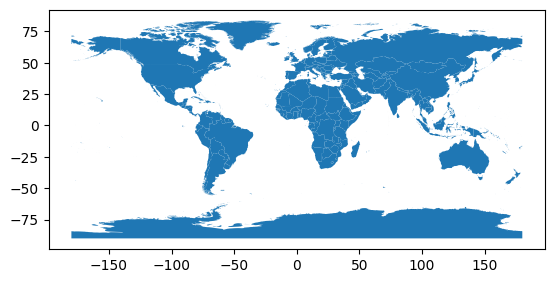

In [11]:
# plot simple

countries.plot()

In [12]:
rivers=gpd.read_file(os.path.join("maps","World_Hydrography","World_Hydrography.shp"))
cities=gpd.read_file(os.path.join("maps","World_Cities","World_Cities.shp"))

In [13]:
rivers.head()

,NAME,SYSTEM,geometry
0,Aldan,Lena,"LINESTRING (124.00678 56.47258, 123.25956 56.6..."
1,Amazon,Amazon,"MULTILINESTRING ((-61.27730 -3.60706, -60.6846..."
2,Amu Darya,NaN,"LINESTRING (73.98818 37.49952, 73.52595 37.528..."
3,Amur,NaN,"LINESTRING (122.63956 49.99730, 120.47874 49.2..."
4,Angara,NaN,"LINESTRING (105.07841 51.93053, 103.92959 51.7..."


<Axes: >

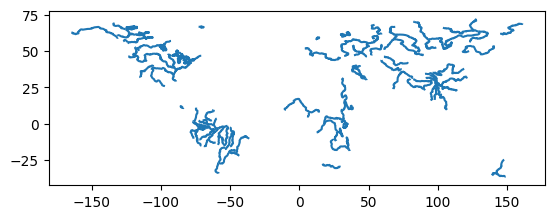

In [14]:
# visualizing rivers
rivers.plot()

<Axes: >

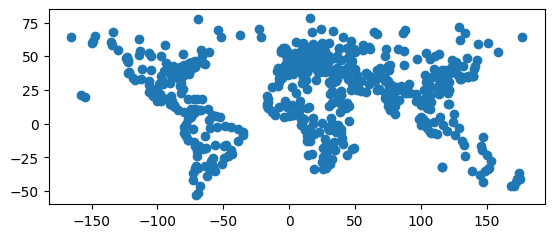

In [15]:
# visualizing cities
cities.plot()


<Axes: >

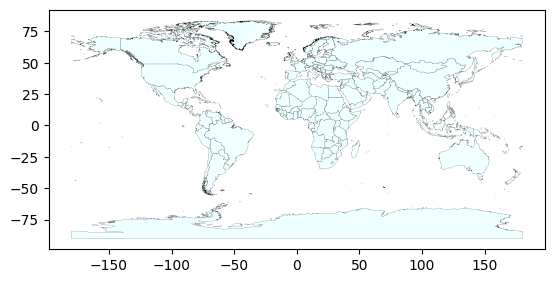

In [16]:
countries.plot(facecolor="azure",#color of polygon fill
               edgecolor='black', #color of lines
               linewidth=0.1) #thickness of lines

<Axes: >

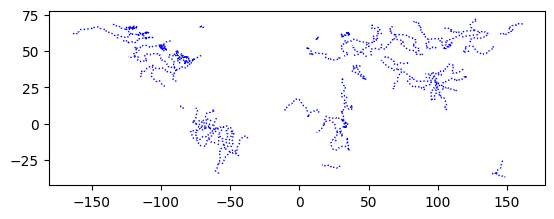

In [17]:
rivers.plot(edgecolor='blue', 
            linewidth=1,
            linestyle='dotted')

<Axes: >

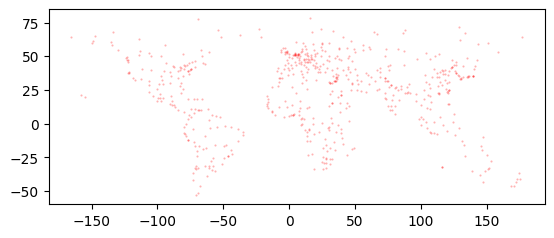

In [18]:
cities.plot(marker='.', # marker type
            color='red', 
            markersize=1,
            alpha=0.3) # transparency

In [19]:
cities.head()

,NAME,COUNTRY,CAPITAL,geometry
0,Murmansk,Russia,N,POINT (33.08604 68.96355)
1,Arkhangelsk,Russia,N,POINT (40.64616 64.52067)
2,Saint Petersburg,Russia,N,POINT (30.45333 59.95189)
3,Magadan,Russia,N,POINT (150.78001 59.57100)
4,Perm',Russia,N,POINT (56.23246 58.00024)


In [20]:
countries.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [21]:
rivers.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [22]:
cities.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

<Axes: >

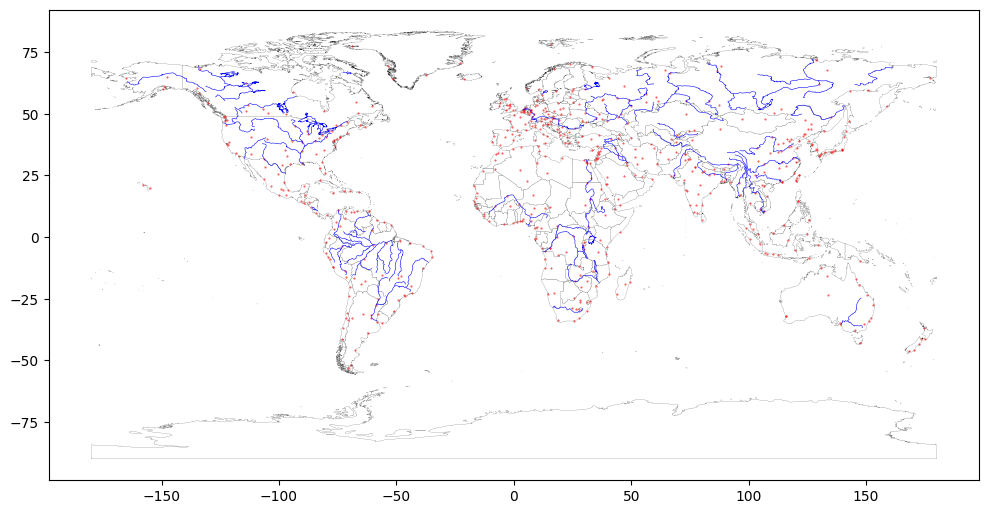

In [23]:
base = countries.plot(facecolor="white", edgecolor='black', linewidth=0.1,figsize=(12,12))
cities.plot(marker='.', color='red', markersize=1,alpha=0.7,
            ax=base) # on top of..
rivers.plot(edgecolor='blue', linewidth=0.4,
            ax=base)# on top of..

In [25]:
#pip install folium


     ---------------------------------------- 0.0/102.3 kB ? eta -:--:--
     --------------------------- ----------- 71.7/102.3 kB 2.0 MB/s eta 0:00:01
     -------------------------------------- 102.3/102.3 kB 2.0 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [26]:
import folium

In [28]:
#pip install mapclassify

     ---------------------------------------- 0.0/42.2 MB ? eta -:--:--
     ---------------------------------------- 0.3/42.2 MB 15.4 MB/s eta 0:00:03
      --------------------------------------- 0.6/42.2 MB 9.1 MB/s eta 0:00:05
      --------------------------------------- 0.6/42.2 MB 9.1 MB/s eta 0:00:05
      --------------------------------------- 0.6/42.2 MB 3.9 MB/s eta 0:00:11
      --------------------------------------- 0.8/42.2 MB 4.1 MB/s eta 0:00:11
      --------------------------------------- 0.8/42.2 MB 3.4 MB/s eta 0:00:13
      --------------------------------------- 0.9/42.2 MB 3.3 MB/s eta 0:00:13
      --------------------------------------- 1.0/42.2 MB 3.0 MB/s eta 0:00:14
     - -------------------------------------- 1.2/42.2 MB 3.1 MB/s eta 0:00:14
     - -------------------------------------- 1.2/42.2 MB 2.8 MB/s eta 0:00:15
     - -------------------------------------- 1.4/42.2 MB 2.9 MB/s eta 0:00:15
     - -------------------------------------- 1.4/42.2 MB 

In [29]:
m = cities.explore(color="red", 
                   name="cities")#optional

m = rivers.explore(m=m, color="blue",
                   name="rivers")#optional
#folium.LayerControl().add_to(m) #optional
m


In [30]:
brasil=countries[countries.COUNTRY=='Brazil']

In [31]:
cities_clipped = gpd.clip(gdf=cities,
                          mask=brasil)
rivers_clipped = gpd.clip(gdf=rivers,
                               mask=brasil)

<Axes: >

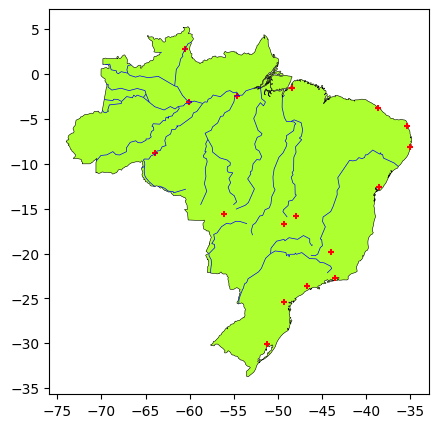

In [32]:
base = brasil.plot(facecolor="greenyellow", edgecolor='black', linewidth=0.4,figsize=(5,5))
cities_clipped.plot(marker='+', color='red', markersize=15,ax=base)
rivers_clipped.plot(edgecolor='blue', linewidth=0.5,ax=base)

In [33]:
brazilCoord=[-14.235004, -51.92528]

In [34]:
m = cities.explore(location=brazilCoord,
                   zoom_start=4.5,
                   tiles='CartoDB positron',
                   color='red',
                   name="cities") #optional
m = rivers.explore(m=m, color="blue",
                   name="rivers")#optional
# folium.LayerControl().add_to(m) #optional
m

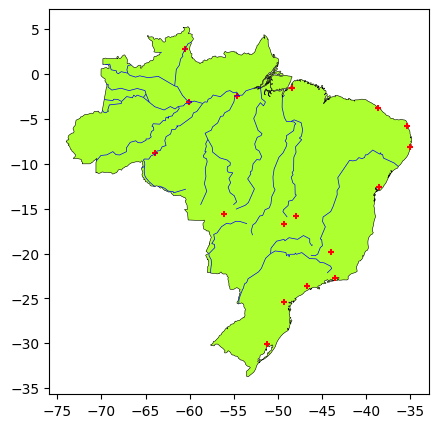

In [35]:
# save the map as image
import matplotlib.pyplot as plt

base = brasil.plot(facecolor="greenyellow", edgecolor='black', linewidth=0.4,figsize=(5,5))
map2=cities_clipped.plot(marker='+', color='red', markersize=15,ax=base)
mapEnd=rivers_clipped.plot(edgecolor='blue', linewidth=0.5,ax=base)
plt.savefig(os.path.join("maps",'mapEnd.jpg'))

In [36]:
countries.to_file(os.path.join("maps","worldMaps.gpkg"), layer='countries', driver="GPKG")
cities.to_file(os.path.join("maps","worldMaps.gpkg"), layer='cities', driver="GPKG")
rivers.to_file(os.path.join("maps","worldMaps.gpkg"), layer='rivers', driver="GPKG")

In [ ]:
worldMaps='https://github.com/CienciaDeDatosEspacial/code_and_data/raw/main/maps/worldMaps.gpkg'

In [ ]:
from  fiona import listlayers

listlayers(worldMaps)

In [ ]:
countries=gpd.read_file(worldMaps,layer='countries')
cities=gpd.read_file(worldMaps,layer='cities')
rivers=gpd.read_file(worldMaps,layer='rivers')

In [ ]:
base = countries.plot(facecolor='gainsboro')
cities.plot(ax=base, markersize=0.5, color='red') 
rivers.plot(ax=base, linewidth=0.5)

In [ ]:
import os
os.environ['USE_PYGEOS'] = '0' # only if you have pygeos

import geopandas as gpd
from  fiona import listlayers

#maps
worldMaps='https://github.com/CienciaDeDatosEspacial/code_and_data/raw/main/maps/worldMaps.gpkg'

#layers in maps
listlayers(worldMaps)